In [5]:
from dottamine import dotim
import numpy as np
import skimage as sk
# import napari
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import center_of_mass, rotate, gaussian_filter, zoom
import matplotlib.pyplot as plt
import copy

In [6]:
mask = sk.io.imread('domes/70_denoised_mask.tif').astype(np.uint8)
image = sk.io.imread('domes/70_denoised.tif')
original_image = copy.copy(image[3])
image = np.transpose(image[3], axes=(1, 0, 2))
image = np.transpose(image, axes=(2, 1, 0))

In [7]:
## Close the mask
closed_mask = []
for i in mask:
    full = cv2.morphologyEx(i, cv2.MORPH_CLOSE, np.ones((15, 15)))
    closed_mask.append(full)

## Find the top line of the mask
closed_mask = np.array(closed_mask)
first_nonzero_indices = np.argmax(closed_mask != 0, axis=1)
first_nonzero_indices = first_nonzero_indices

## Move up or down the line
first_nonzero_indices = first_nonzero_indices + 0 # Units to move the line. If > 0  the line will be lower, useful to get the basal? If < 0 the line will be higher.
first_nonzero_indices[first_nonzero_indices < 0] = 0
first_nonzero_indices[first_nonzero_indices >= closed_mask.shape[1]] = closed_mask.shape[1]-1
## Fi move up or down the line

top_mask = np.zeros_like(closed_mask)
top_mask[np.arange(closed_mask.shape[0])[:, None, None], first_nonzero_indices[:, None, :], np.arange(closed_mask.shape[2])] = 1 # Top mask is a 3D array that contains the top line of the actual mask

top_mask[:,0,:] = 0

top_mask = top_mask.astype(np.float64)

filtered = gaussian_filter(top_mask, 30)
epithelial = filtered*image


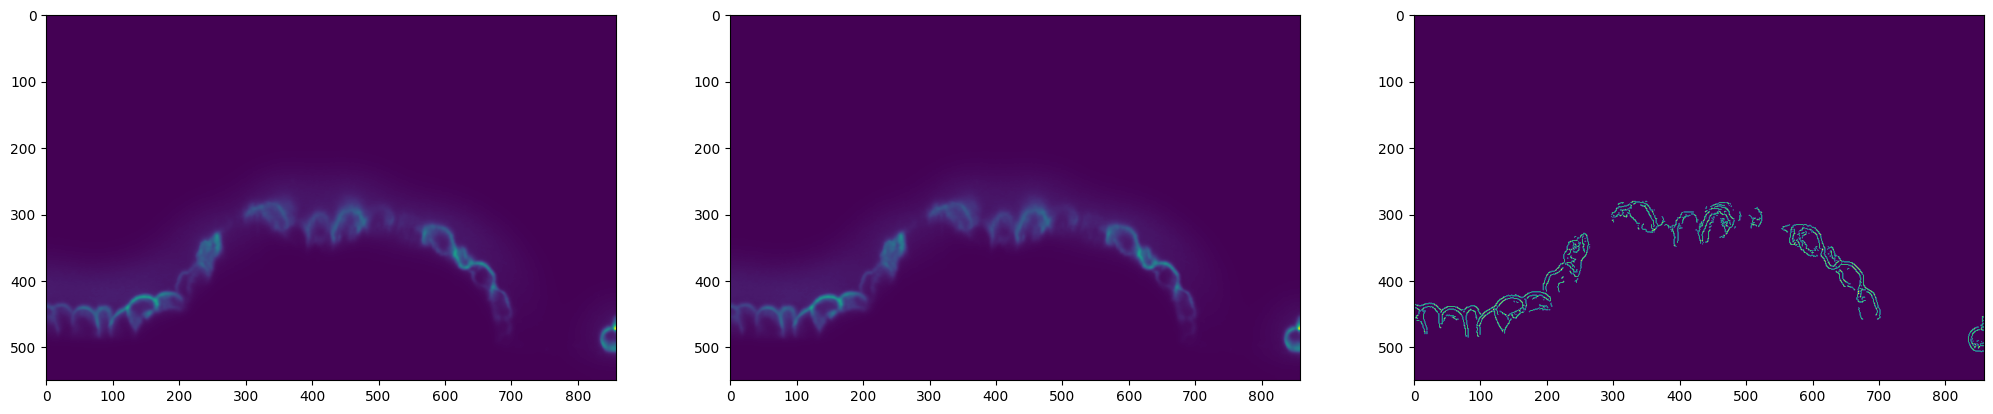

In [50]:
plt.figure(figsize=(25,15))
plt.subplot(131)
plt.imshow(epithelial[400])
plt.subplot(132)
min_val = np.min(epithelial[400])
max_val = np.max(epithelial[400])
stretched_image = np.uint8(255 * (epithelial[400] - min_val) / (max_val - min_val))
plt.imshow(stretched_image)
plt.subplot(133)
plt.imshow(cv2.Canny(stretched_image, 10, 30))

0.0 8.795893278095729
uint8


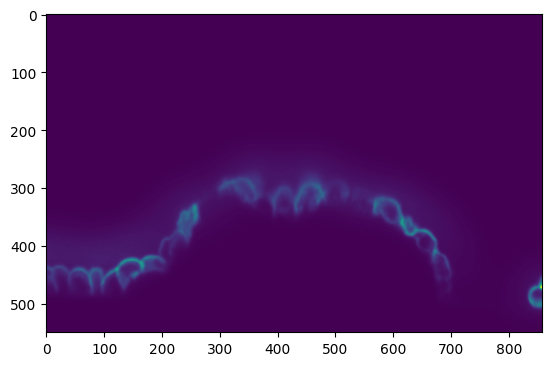

In [37]:
min_val = np.min(epithelial[400])
max_val = np.max(epithelial[400])
print(min_val, max_val)
stretched_image = np.uint8(255 * (epithelial[400] - min_val) / (max_val - min_val))
plt.imshow(stretched_image)
print(stretched_image.dtype)